## Proyecto 2
- Angie Carolina Quintana Guerrero
- Juan Pablo Marín Vanegas

El dataset utilizado para este proyecto describe las caracteristicas de una muestra de vehiculos con el objetivo de clasificar la clase del vehiculo considerando sus atributos a través de un modelo de clasificación.

## Librerias utilizadas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import learning_curve

## Importar dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [3]:
data = pd.read_csv(url, header=None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Al importar el dataset identificamos que no contiene el nombre de las variables, por lo anterior se procede con su caracterización y validación.

In [5]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data = pd.read_csv(url, header=None, names=column_names)

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Una vez actualizado el dataset se validan la cantidad de variables y registros, donde por la naturaleza descriptiva de las variables podemos definir que son variables categoricas, a pesar de que las variables "doors" y "persons" son números, en realidad describen una cualidad y no una cantidad.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Análisis exploratorio de los datos

In [8]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [9]:
for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


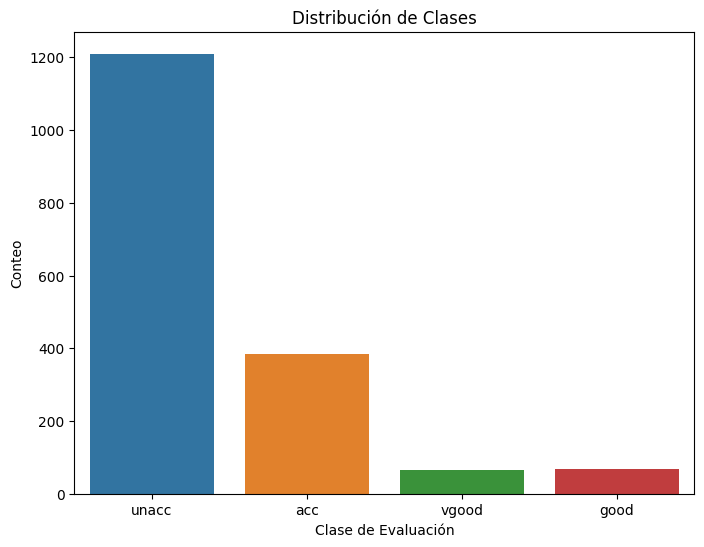

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Distribución de Clases')
plt.xlabel('Clase de Evaluación')
plt.ylabel('Conteo')
plt.show()

## Modelos de Clasificación

Se divide el dataset para entrenar y testear el modelo por medio de 3 diferentes modelo de clasificación con el objetivo de determinar cual presenta un mejor ajuste y resultado

In [11]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('class', axis=1)
y = data['class']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir varios modelos de clasificación
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"Entrenando y evaluando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Informe de clasificación para {name}:")
    print(report)
    print("=" * 60)

Entrenando y evaluando SVM...
Informe de clasificación para SVM:
              precision    recall  f1-score   support

         acc       0.99      0.89      0.94        83
        good       0.59      0.91      0.71        11
       unacc       1.00      1.00      1.00       235
       vgood       0.84      0.94      0.89        17

    accuracy                           0.97       346
   macro avg       0.85      0.94      0.88       346
weighted avg       0.98      0.97      0.97       346

Entrenando y evaluando Random Forest...
Informe de clasificación para Random Forest:
              precision    recall  f1-score   support

         acc       0.96      0.89      0.92        83
        good       0.59      0.91      0.71        11
       unacc       0.99      1.00      1.00       235
       vgood       0.93      0.82      0.87        17

    accuracy                           0.96       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.97      0.96  

## Validación de Sobreajuste

Curva de aprendizaje para SVM:


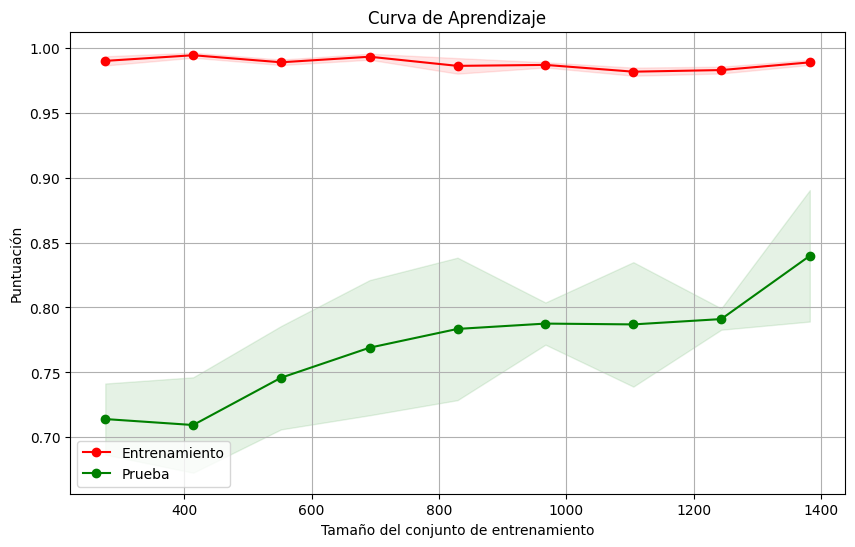

Curva de aprendizaje para Random Forest:


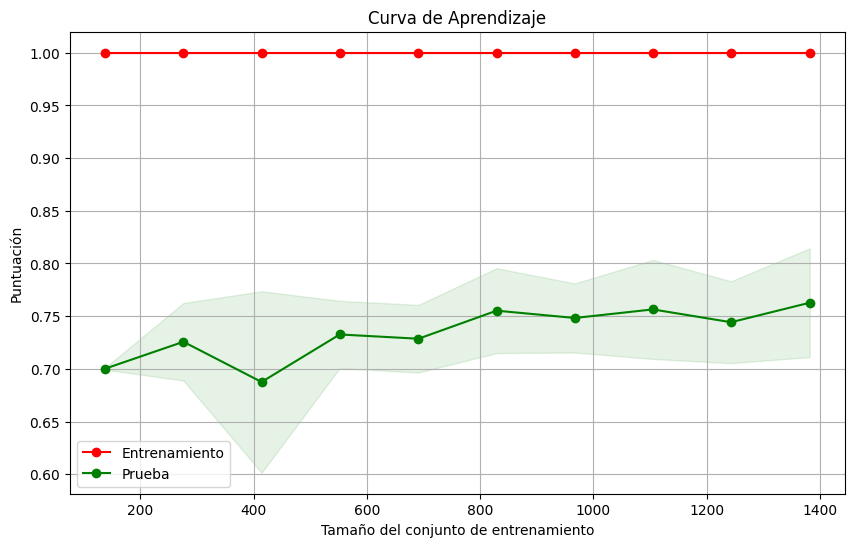

Curva de aprendizaje para Decision Tree:


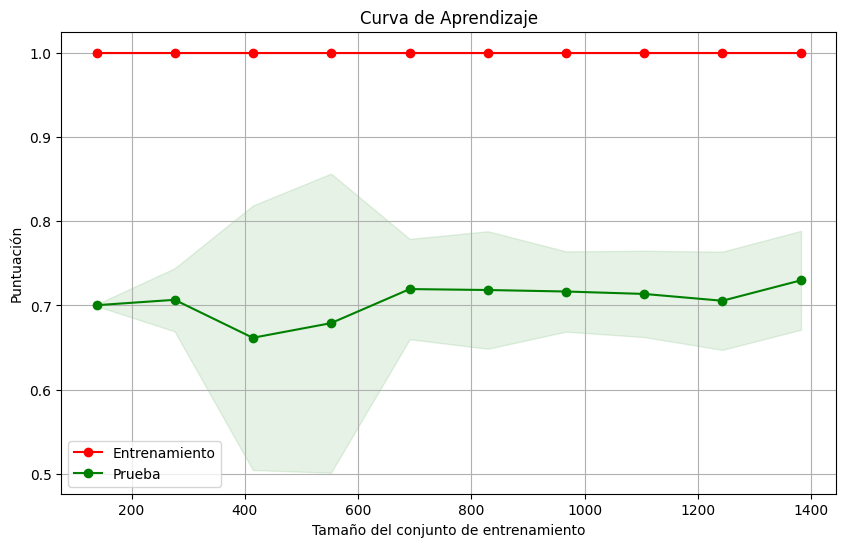

In [12]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Prueba")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Puntuación")
    plt.title("Curva de Aprendizaje")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Crear y mostrar curvas de aprendizaje para cada modelo
for name, model in models.items():
    print(f"Curva de aprendizaje para {name}:")
    plot_learning_curve(model, X, y)


## Conclusiones

Los informes de clasificación de los tres modelos indican que:

**Precisión y Exhaustividad:**

- SVM y Random Forest muestran altas precisiones y exhaustividades en la mayoría de las clases, con valores superiores al 90% en la mayoría de los casos.
- El Árbol de Decisión también muestra buenos resultados en términos de precisión y exhaustividad, aunque ligeramente inferiores a los otros dos modelos en algunas clases.

**F1-Score:**

Todos los modelos tienen puntajes F1 sólidos, lo que indica un buen equilibrio entre precisión y exhaustividad.
La clase 'good' tiene un F1-score más bajo en comparación con las otras clases en todos los modelos, lo que puede deberse a la menor cantidad de datos de entrenamiento para esta clase.

**Exactitud (Accuracy):**

Todos los modelos muestran una alta precisión general, con valores de accuracy alrededor del 97%.
Esto sugiere que los modelos son capaces de generalizar bien a partir de los datos de prueba.

En resumen, los tres modelos (SVM, Random Forest y Árbol de Decisión) muestran un rendimiento sólido en la clasificación de los datos de evaluación de automóviles. 

Así mismo, el repositorio donde se aloja el dataset muestra refrecencias acordes a lo encontrado en el desarrollo de este proyecto.

## El mejor modelo de clasificación es...

Para nuestro criterio y conforme los resultados, justificamos que el mejor modelo de clasificación para este dataset es el SVM porque sus reportes presentan puntuaciones altas y sólidas, además su escalabilidad indica que no hay indicios de sobreajuste a medida que aumenta el tamaño de la muestra, lo cual lo hace ideal para los intereses del proyecto.